![data-x](http://oi64.tinypic.com/o858n4.jpg)

___

## Homework 04


### NAME: Louis Tilloy

## STUDENT ID: 3034388270

In [1]:
# Load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Pandas Introduction


##  Reading File


#### 1.1) Read the CSV file called 'data3.csv' into a dataframe called df. 
#### Data description
* Data source: http://www.fao.org/nr/water/aquastat/data/query/index.html?* lang=en
* Data, units:
* GDP, current USD (CPI adjusted)
* NRI, mm/yr
* Population density, inhab/km^2
* Total area of the country, 1000 ha = 10km^2
* Total Population, unit 1000 inhabitants


In [2]:
dataframe = pd.read_csv("data3.csv")

#### 2.1 ) Display the first 10 rows of the dataframe

In [3]:
dataframe.head(10)

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Other
0,Argentina,9.0,Total area of the country,4100.0,1962.0,278040.0,E,NaN
1,Argentina,9.0,Total area of the country,4100.0,1967.0,278040.0,E,NaN
2,Argentina,9.0,Total area of the country,4100.0,1972.0,278040.0,E,NaN
3,Argentina,9.0,Total area of the country,4100.0,1977.0,278040.0,E,NaN
4,Argentina,9.0,Total area of the country,4100.0,1982.0,278040.0,E,NaN
5,Argentina,9.0,Total area of the country,4100.0,1987.0,278040.0,E,NaN
6,Argentina,9.0,Total area of the country,4100.0,1992.0,278040.0,E,NaN
7,Argentina,9.0,Total area of the country,4100.0,1997.0,278040.0,E,NaN
8,Argentina,9.0,Total area of the country,4100.0,2002.0,278040.0,E,NaN
9,Argentina,9.0,Total area of the country,4100.0,2007.0,278040.0,E,NaN


#### 2.2 ) Display the column names.

In [4]:
dataframe.columns

Index(['Area', 'Area Id', 'Variable Name', 'Variable Id', 'Year', 'Value',
       'Symbol', 'Other'],
      dtype='object')

#### 2.3) Use iloc to display the first 3 rows and first 4 columns.

In [5]:
dataframe.iloc[0:3, 0:4]

,Area,Area Id,Variable Name,Variable Id
0,Argentina,9.0,Total area of the country,4100.0
1,Argentina,9.0,Total area of the country,4100.0
2,Argentina,9.0,Total area of the country,4100.0




## Data Preprocessing

#### 3.1 ) Find all the rows that  have 'NaN' in the 'Symbol' column. Display first 5 rows.

##### Hint : You might have to use a mask

In [6]:
nan_rows = dataframe[dataframe["Symbol"].isnull()]
nan_rows.head(5)

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol,Other
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,E - External data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,I - AQUASTAT estimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,K - Aggregate data,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,L - Modelled data,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3.2 )  Now, we will try to get rid of the NaN valued rows and columns. First, drop the column 'Other' which only has 'NaN' values. Then drop all other rows that have any column with a value 'NaN'.  Then display the last 5 rows of the dataframe.

In [7]:
dataframe_2 = dataframe.drop(columns='Other')
dataframe_2 = dataframe_2.dropna()
dataframe_2.head()

,Area,Area Id,Variable Name,Variable Id,Year,Value,Symbol
0,Argentina,9.0,Total area of the country,4100.0,1962.0,278040.0,E
1,Argentina,9.0,Total area of the country,4100.0,1967.0,278040.0,E
2,Argentina,9.0,Total area of the country,4100.0,1972.0,278040.0,E
3,Argentina,9.0,Total area of the country,4100.0,1977.0,278040.0,E
4,Argentina,9.0,Total area of the country,4100.0,1982.0,278040.0,E


#### 4.1) For our analysis we do not want all the columns in our dataframe. Lets  drop all the redundant columns/ features.   
#### **Drop columns**: **Area Id, Variable Id, Symbol**. Save the new dataframe as df1. Display the first 5 rows of the new dataframe.


In [8]:
df1 = dataframe_2.drop(columns=["Area Id", "Variable Id", "Symbol"])
df1.head()

,Area,Variable Name,Year,Value
0,Argentina,Total area of the country,1962.0,278040.0
1,Argentina,Total area of the country,1967.0,278040.0
2,Argentina,Total area of the country,1972.0,278040.0
3,Argentina,Total area of the country,1977.0,278040.0
4,Argentina,Total area of the country,1982.0,278040.0


#### 4.2) Display all the unique values in your new dataframe for columns: Area, Variable Name, Year.


In [9]:
print("Area: ", df1["Area"].unique())
print()

print("Variable Name: ", df1["Variable Name"].unique())
print()

print("Year: ", df1["Year"].unique())

Area:  ['Argentina' 'Australia' 'Germany' 'Iceland' 'Ireland' 'Sweden'
 'United States of America']

Variable Name:  ['Total area of the country' 'Total population' 'Population density'
 'Gross Domestic Product (GDP)' 'National Rainfall Index (NRI)']

Year:  [1962. 1967. 1972. 1977. 1982. 1987. 1992. 1997. 2002. 2007. 2012. 2014.
 2015. 1963. 1970. 1974. 1978. 1984. 1990. 1964. 1981. 1985. 1996. 2001.
 1969. 1973. 1979. 1993. 1971. 1975. 1986. 1991. 1998. 2000. 1965. 1983.
 1988. 1995.]


#### 4.3) Convert the Year column to pandas datetime. Convert the 'Year' column float values to pandas datetime objects, where each year is represented as the first day of that year. Also display the first 5 values of column after conversion.

##### For eg: 1962.0 will be represented as 1962-01-01 


In [10]:
df1["Year"] = pd.to_datetime(df1["Year"].astype(int), format="%Y")
df1.head()

,Area,Variable Name,Year,Value
0,Argentina,Total area of the country,1962-01-01,278040.0
1,Argentina,Total area of the country,1967-01-01,278040.0
2,Argentina,Total area of the country,1972-01-01,278040.0
3,Argentina,Total area of the country,1977-01-01,278040.0
4,Argentina,Total area of the country,1982-01-01,278040.0


## Plot

#### 5.1) Use pandas to plot a bar graph showing the count for each unique value in the column 'Area'. Give it a title.

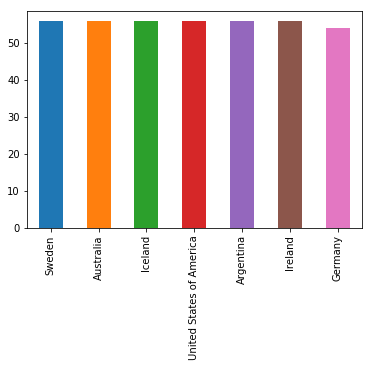

In [11]:
df1['Area'].value_counts().plot(kind='bar')

## Extract specific statistics from the preprocessed data:

#### 6.1)  Create a dataframe 'dftemp' to store rows where Area is 'Iceland'. Display the dataframe.

In [12]:
dftemp = df1[df1['Area'] == "Iceland"]
dftemp

,Area,Variable Name,Year,Value
166,Iceland,Total area of the country,1962-01-01,1.030000e+04
167,Iceland,Total area of the country,1967-01-01,1.030000e+04
168,Iceland,Total area of the country,1972-01-01,1.030000e+04
169,Iceland,Total area of the country,1977-01-01,1.030000e+04
170,Iceland,Total area of the country,1982-01-01,1.030000e+04
171,Iceland,Total area of the country,1987-01-01,1.030000e+04
172,Iceland,Total area of the country,1992-01-01,1.030000e+04
173,Iceland,Total area of the country,1997-01-01,1.030000e+04
174,Iceland,Total area of the country,2002-01-01,1.030000e+04
175,Iceland,Total area of the country,2007-01-01,1.030000e+04


#### 7.1) Print the years when the National Rainfall Index (NRI) was greater than 900 and less than 950 in Iceland. Use the dataframe you created in the previous question 'dftemp'. 

In [13]:
dftemp[(dftemp["Variable Name"] == "National Rainfall Index (NRI)") &
       (dftemp["Value"] < 950) &
       (dftemp["Value"] > 900)]

,Area,Variable Name,Year,Value
217,Iceland,National Rainfall Index (NRI),1981-01-01,932.6
221,Iceland,National Rainfall Index (NRI),1998-01-01,923.4


## US statistics: 


#### 8.1) Create a new DataFrame called **`df_usa`** that only contains values where 'Area' is equal to 'United States of America'. Set the indices to be the 'Year' column    ( Use .set_index( ) ). Display the dataframe head.

In [14]:
df_usa = df1[df1["Area"] == "United States of America"].set_index("Year")
df_usa.head()

,Area,Variable Name,Value
Year,,,
1962-01-01,United States of America,Total area of the country,962909.0
1967-01-01,United States of America,Total area of the country,962909.0
1972-01-01,United States of America,Total area of the country,962909.0
1977-01-01,United States of America,Total area of the country,962909.0
1982-01-01,United States of America,Total area of the country,962909.0



#### 8.2) Pivot the DataFrame so that the unique values in the column 'Variable Name' becomes the columns. The DataFrame values should be the ones in the the 'Value' column. Save it in df_usa. Display the dataframe head.

In [15]:
df_variables = df_usa.pivot(index=df_usa.index, columns='Variable Name')['Value']
df_usa = df_usa.drop(columns=["Variable Name", "Value"])
df_usa[df_variables.columns] = df_variables
df_usa.head()

,Area,Gross Domestic Product (GDP),National Rainfall Index (NRI),Population density,Total area of the country,Total population
Year,,,,,,
1962-01-01,United States of America,6.050000e+11,NaN,19.93,962909.0,191861.0
1967-01-01,United States of America,8.620000e+11,NaN,21.16,962909.0,203713.0
1972-01-01,United States of America,1.280000e+12,NaN,22.14,962909.0,213220.0
1977-01-01,United States of America,2.090000e+12,NaN,23.17,962909.0,223091.0
1982-01-01,United States of America,3.340000e+12,NaN,24.30,962909.0,233954.0


#### 8.3) Rename new columns to  ['GDP','NRI','PD','Area','Population'] and display the head.


In [16]:
# I chose to drop the original "Area" column since it is "United States of America"
# for each row of the dataframe and since it is in conflict with the new "Area" column
# that we want to create
df_usa = df_usa.drop(columns="Area")

df_usa = df_usa.rename({
    "Gross Domestic Product (GDP)": "GDP",
    "National Rainfall Index (NRI)": "NRI",
    "Population density": "PD",
    "Total area of the country": "Area",
    "Total population": "Population"
}, axis="columns")
df_usa.head()

,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,NaN,19.93,962909.0,191861.0
1967-01-01,8.620000e+11,NaN,21.16,962909.0,203713.0
1972-01-01,1.280000e+12,NaN,22.14,962909.0,213220.0
1977-01-01,2.090000e+12,NaN,23.17,962909.0,223091.0
1982-01-01,3.340000e+12,NaN,24.30,962909.0,233954.0


#### 8.4) Replace all 'Nan' values in df_usa with 0. Display the head of the dataframe.

In [17]:
df_usa = df_usa.fillna(value=0)
df_usa.head()

,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,0.0,19.93,962909.0,191861.0
1967-01-01,8.620000e+11,0.0,21.16,962909.0,203713.0
1972-01-01,1.280000e+12,0.0,22.14,962909.0,213220.0
1977-01-01,2.090000e+12,0.0,23.17,962909.0,223091.0
1982-01-01,3.340000e+12,0.0,24.30,962909.0,233954.0


## Use df_usa:

#### 9.1 Multiply the 'Area' column for all countries by 10 (so instead of 1000 ha, the unit becomes 100 ha = 1km^2). Display the dataframe head.


In [18]:
df_usa["Area"] *= 10
df_usa.head()

,GDP,NRI,PD,Area,Population
Year,,,,,
1962-01-01,6.050000e+11,0.0,19.93,9629090.0,191861.0
1967-01-01,8.620000e+11,0.0,21.16,9629090.0,203713.0
1972-01-01,1.280000e+12,0.0,22.14,9629090.0,213220.0
1977-01-01,2.090000e+12,0.0,23.17,9629090.0,223091.0
1982-01-01,3.340000e+12,0.0,24.30,9629090.0,233954.0



#### 9.2: Create a new column in df_usa called 'GDP/capita' and populate it with the calculated GDP per capita. Round the results to two decimal points. Display the dataframe head.
GDP per capita = (GDP / Population) * 1000

In [19]:
# units is 1000 habitants => no 1000 scalar in the formula
df_usa['GDP/capita'] = (df_usa["GDP"] / df_usa["Population"]).round(2)
df_usa.head()

,GDP,NRI,PD,Area,Population,GDP/capita
Year,,,,,,
1962-01-01,6.050000e+11,0.0,19.93,9629090.0,191861.0,3153324.54
1967-01-01,8.620000e+11,0.0,21.16,9629090.0,203713.0,4231443.26
1972-01-01,1.280000e+12,0.0,22.14,9629090.0,213220.0,6003189.19
1977-01-01,2.090000e+12,0.0,23.17,9629090.0,223091.0,9368374.34
1982-01-01,3.340000e+12,0.0,24.30,9629090.0,233954.0,14276310.73



#### 9.3: Find the maximum value of the 'NRI' column in the US (using pandas methods). What year does the max value occur? Display the values.

In [20]:
max_NRI = df_usa.max(axis=0)['NRI']
max_index = df_usa.idxmax(axis=0)['NRI']

print("Maximum value of the 'NRI' column: ", max_NRI)
print("Year of the maximum value of the 'NRI' column: ", str(max_index)[0:4])

Maximum value of the 'NRI' column:  1020.0
Year of the maximum value of the 'NRI' column:  1992
